In [3]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam



from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

import math
import numpy as np
import tensorflow as tf

In [4]:
csv_file = './data/palmerpenguins_original.csv'
data = pd.read_csv(csv_file)

dataset = data.loc[:, ['species', 'sex', 'bill_length_mm', 'body_mass_g']]
dataset = dataset.dropna()
dataset

,species,sex,bill_length_mm,body_mass_g
0,Adelie,male,39.1,3750.0
1,Adelie,female,39.5,3800.0
2,Adelie,female,40.3,3250.0
4,Adelie,female,36.7,3450.0
5,Adelie,male,39.3,3650.0
...,...,...,...,...
339,Chinstrap,male,55.8,4000.0
340,Chinstrap,female,43.5,3400.0
341,Chinstrap,male,49.6,3775.0
342,Chinstrap,male,50.8,4100.0


In [5]:
def get_specimen_index(sp: str) -> int:
    species = dataset['species'].unique()

    for i in range(len(species)):
        specimen = species[i]

        if specimen.lower() == sp.lower():
            return i
        
    return 0

dataset['species_category'] = [get_specimen_index(sp) for sp in dataset['species']]
dataset['is_male'] = [1 if sex == 'male' else 0 for sex in dataset['sex']]

dataset = dataset.drop(columns=['species', 'sex'])
dataset


,bill_length_mm,body_mass_g,species_category,is_male
0,39.1,3750.0,0,1
1,39.5,3800.0,0,0
2,40.3,3250.0,0,0
4,36.7,3450.0,0,0
5,39.3,3650.0,0,1
...,...,...,...,...
339,55.8,4000.0,2,1
340,43.5,3400.0,2,0
341,49.6,3775.0,2,1
342,50.8,4100.0,2,1


In [6]:
X = dataset.loc[:, ['bill_length_mm', 'is_male', 'species_category']]
Y = dataset['body_mass_g']

In [7]:
X_scaler = StandardScaler()
X_scaled = X_scaler.fit_transform(X)

# Scale the target variable too
y_scaler = StandardScaler()
Y_scaled = y_scaler.fit_transform(Y.values.reshape(-1, 1))

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2)

In [9]:
def draw_training_graph(train_loss, val_loss):
    plt.figure(figsize=(10, 6))
    plt.plot(train_loss, 'o-', color='green', label='Training Loss')
    plt.plot(val_loss, 'o-', color='red', label='Validation Loss')
    plt.title('Model Mean Squared Error')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    plt.legend(loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

def calc_mse(model):
    y_pred_scaled = model.predict(x_test)

    y_pred_original = y_scaler.inverse_transform(y_pred_scaled)
    y_test_original = y_scaler.inverse_transform(y_test)

    mse_original = mean_squared_error(y_test_original, y_pred_original)

    return mse_original

# Models 
- Base Model: Perceptron
- Model 4: 4x16
- Model 2: 3x16
- Model 3: 2x16

For the Network I chose the ReLU activation function because:

-   Lower computational cost
-	Simple derivative (1 when input > 0, 0 otherwise)
-	Prevents negative outputs (Negative penguin weights)

I also read that sigmoid is mostly used for classification, and the Swish activation function will only really make a difference in a more complex network.

#### Training parameters

I searched up an what an ideal learning rate would be and i found out on multiple websites that the learning rate is mostly 0.001 to 0.1. And i chose to use the same settings as with part 2 of this asigment.

In [10]:
tf.config.run_functions_eagerly(True)

epochs = 100
learning_rate = 0.001
validation_split = 0.11


def get_optimizer():
    return tf.keras.optimizers.Adam(learning_rate=learning_rate)

## Perceptron

In [11]:
perceptron = Sequential()
perceptron.add(Dense(1, input_dim=3, activation='relu'))
perceptron.compile(loss='mse', optimizer=get_optimizer())

perceptron_history = perceptron.fit(x_train, y_train, validation_split=validation_split, epochs=epochs)

Epoch 1/100


c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-0U_j6yHP-py3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-0U_j6yHP-py3.10\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.7485 - val_loss: 0.8278
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7373 - val_loss: 0.8260
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7230 - val_loss: 0.8249
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7357 - val_loss: 0.8234
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7014 - val_loss: 0.8220
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7562 - val_loss: 0.8203
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7243 - val_loss: 0.8192
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7397 - val_loss: 0.8186
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7129 - val_loss: 0.8171
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.7221 - val_loss: 0.8163
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.7891 - val_loss: 0.8153
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.6898 - val_loss: 0.8145
E

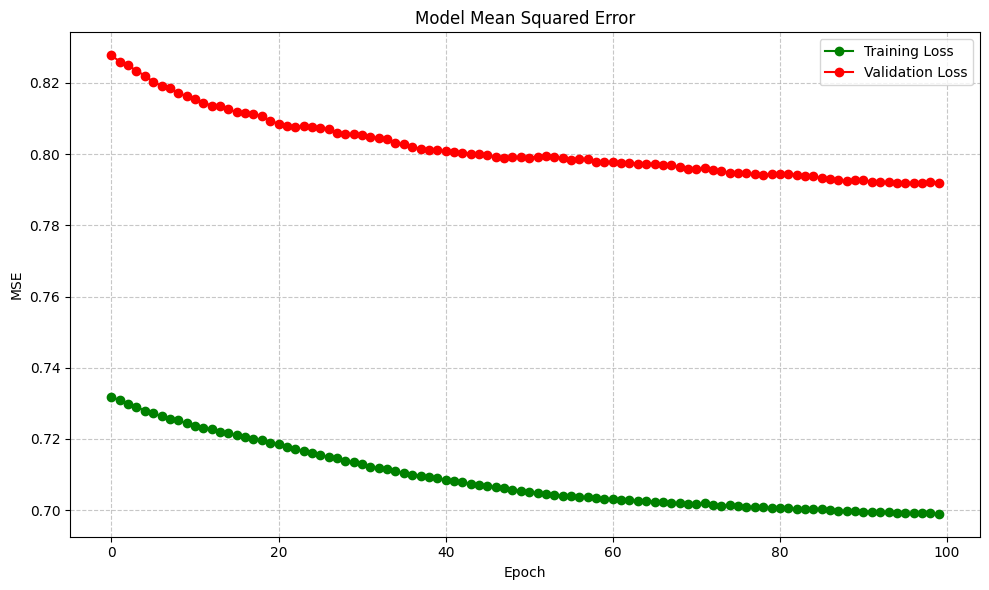

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Squared Error (MSE): 437618.28 grams
Root Mean Squared Error (MSE): 661.53 grams


In [12]:
draw_training_graph(perceptron_history.history['loss'], perceptron_history.history['val_loss'])
perceptron_mse = calc_mse(perceptron)
perceptron_mse_root = math.sqrt(perceptron_mse)

print(f"Mean Squared Error (MSE): {perceptron_mse:.2f} grams")
print(f"Root Mean Squared Error (MSE): {perceptron_mse_root:.2f} grams")


## Model 1

In [13]:
m1 = Sequential()
m1.add(Dense(16, input_dim=3, activation='relu'))
m1.add(Dense(16, activation='relu'))
m1.add(Dense(16, activation='relu'))
m1.add(Dense(16, activation='relu'))
m1.add(Dense(1))

m1.compile(loss='mse', optimizer=get_optimizer())

m1_history = m1.fit(x_train, y_train, validation_split=validation_split, epochs=epochs)

Epoch 1/100


c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-0U_j6yHP-py3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-0U_j6yHP-py3.10\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.9750 - val_loss: 0.9946
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.9151 - val_loss: 0.9447
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.8871 - val_loss: 0.8982
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.8313 - val_loss: 0.8584
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.7502 - val_loss: 0.8215
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.6743 - val_loss: 0.7677
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.6647 - val_loss: 0.7065
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.6286 - val_loss: 0.6554
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.5888 - val_loss: 0.6046
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.5332 - val_loss: 0.5489
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.4755 - val_loss: 0.4944
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 0.4294 - val_loss: 0.4429
E

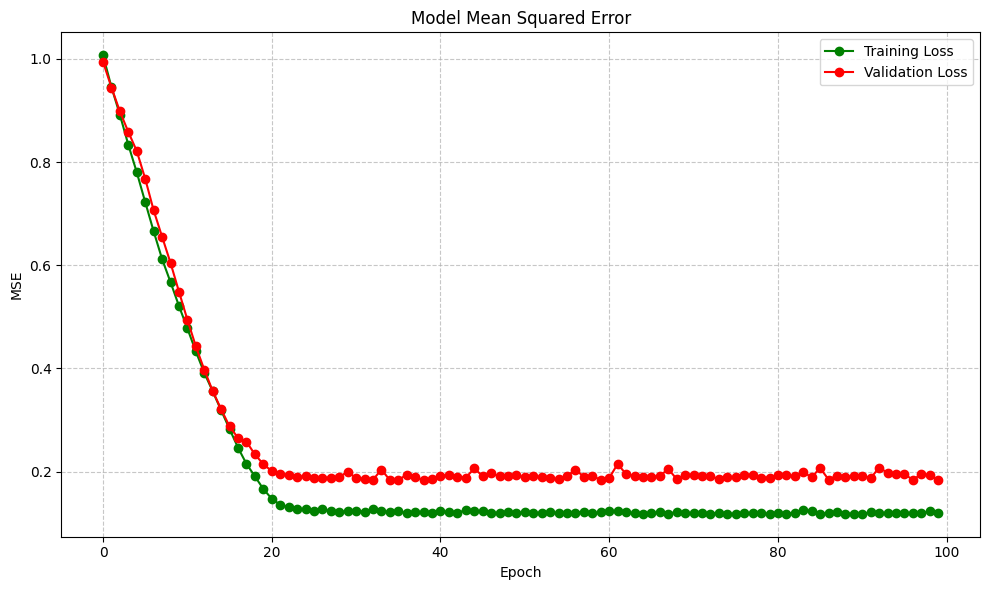

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Mean Squared Error (MSE): 115069.70 grams
Root Mean Squared Error (MSE): 339.22 grams


In [14]:
draw_training_graph(m1_history.history['loss'], m1_history.history['val_loss'])
m1_mse = calc_mse(m1)
m1_mse_root = math.sqrt(m1_mse)

print(f"Mean Squared Error (MSE): {m1_mse:.2f} grams")
print(f"Root Mean Squared Error (MSE): {m1_mse_root:.2f} grams")


## Model 2

In [15]:
m2 = Sequential()
m2.add(Dense(16, input_dim=3, activation='relu'))
m2.add(Dense(16, activation='relu'))
m2.add(Dense(16, activation='relu'))
m2.add(Dense(1))

m2.compile(loss='mse', optimizer=get_optimizer())

m2_history = m2.fit(x_train, y_train, validation_split=validation_split, epochs=epochs)

Epoch 1/100
1/8 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.9448

c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-0U_j6yHP-py3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-0U_j6yHP-py3.10\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.9483 - val_loss: 0.9481
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8973 - val_loss: 0.8962
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.8811 - val_loss: 0.8532
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6914 - val_loss: 0.8174
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.7249 - val_loss: 0.7865
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.6451 - val_loss: 0.7599
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.5599 - val_loss: 0.7318
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6354 - val_loss: 0.7034
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5400 - val_loss: 0.6765
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.5226 - val_loss: 0.6504
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.4934 - val_loss: 0.6111
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.4138 - val_loss: 0.5620
E

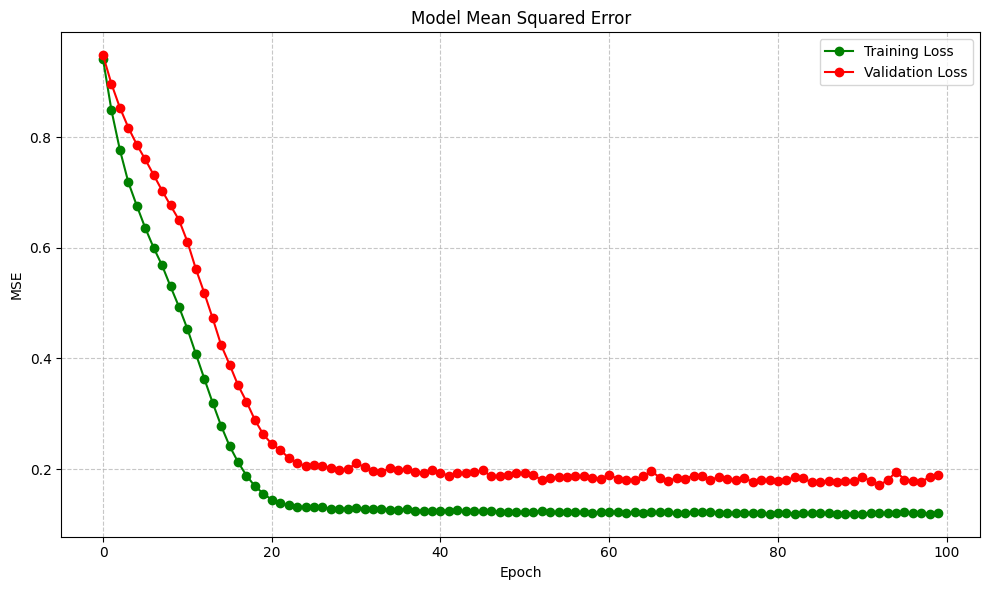

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Mean Squared Error (MSE): 115069.70 grams
Root Mean Squared Error (MSE): 333.19 grams


In [16]:
draw_training_graph(m2_history.history['loss'], m2_history.history['val_loss'])
m2_mse = calc_mse(m2)
m2_mse_root = math.sqrt(m2_mse)

print(f"Mean Squared Error (MSE): {m1_mse:.2f} grams")
print(f"Root Mean Squared Error (MSE): {m2_mse_root:.2f} grams")


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


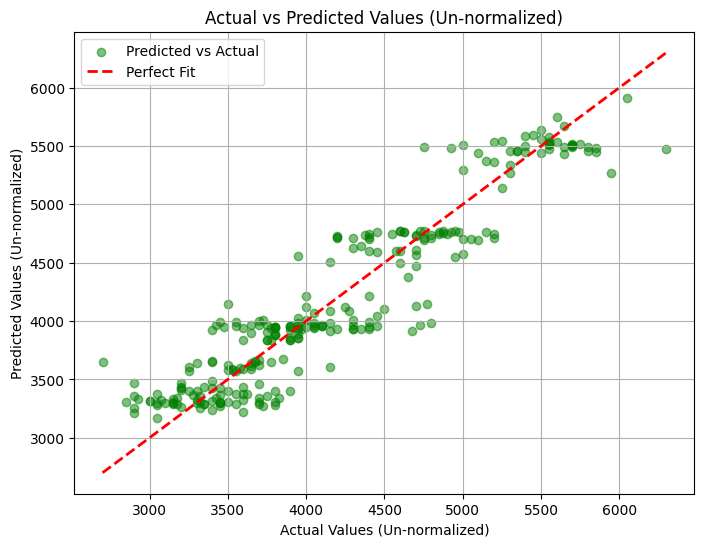

In [32]:
y_pred = m2.predict(x_train)

y_train_unscaled = y_scaler.inverse_transform(y_train.reshape(-1, 1))
y_pred_unscaled = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

# Scatter plot of un-normalized actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_train_unscaled, y_pred_unscaled, alpha=0.5, color='green', label="Predicted vs Actual")
plt.plot([y_train_unscaled.min(), y_train_unscaled.max()], 
         [y_train_unscaled.min(), y_train_unscaled.max()], 'r--', lw=2, label="Perfect Fit")

# Labels and title
plt.xlabel("Actual Values (Un-normalized)")
plt.ylabel("Predicted Values (Un-normalized)")
plt.title("Actual vs Predicted Values (Un-normalized)")
plt.legend()
plt.grid(True)

# Show plot
plt.show()

## Model 3

In [18]:
m3 = Sequential()
m3.add(Dense(16, input_dim=3, activation='relu'))
m3.add(Dense(16, activation='relu'))
m3.add(Dense(1))

m3.compile(loss='mse', optimizer=get_optimizer())

m3_history = m3.fit(x_train, y_train, validation_split=validation_split, epochs=epochs)

Epoch 1/100
4/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 1.0422

c:\Users\david\AppData\Local\pypoetry\Cache\virtualenvs\assignment1-0U_j6yHP-py3.10\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.9769 - val_loss: 0.9040
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.8629 - val_loss: 0.8646
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.7914 - val_loss: 0.8276
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7419 - val_loss: 0.7962
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.7229 - val_loss: 0.7620
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.6262 - val_loss: 0.7330
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.5739 - val_loss: 0.7088
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5574 - val_loss: 0.6837
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.5553 - val_loss: 0.6588
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4645 - val_loss: 0.6325
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.4429 - val_loss: 0.6040
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4380 - val_loss: 0.5755
E

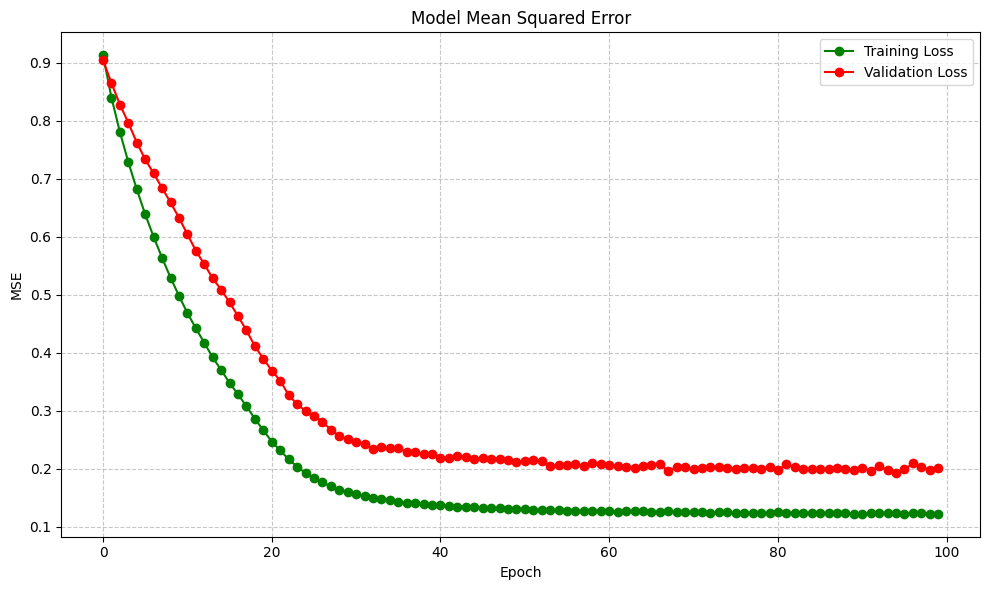

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Mean Squared Error (MSE): 116940.74 grams
Root Mean Squared Error (MSE): 341.97 grams


In [19]:
draw_training_graph(m3_history.history['loss'], m3_history.history['val_loss'])
m3_mse = calc_mse(m3)
m3_mse_root = math.sqrt(m3_mse)

print(f"Mean Squared Error (MSE): {m3_mse:.2f} grams")
print(f"Root Mean Squared Error (MSE): {m3_mse_root:.2f} grams")


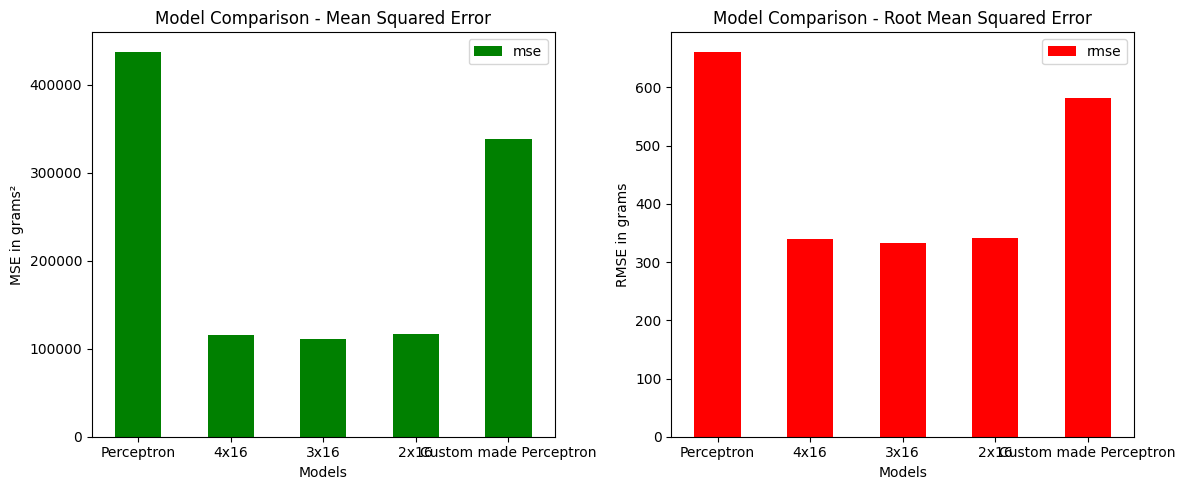

In [20]:


mf = pd.DataFrame({
    'models': ['Perceptron', '4x16', '3x16', '2x16', 'Custom made Perceptron'],
    'mse': [perceptron_mse, m1_mse, m2_mse, m3_mse, 338742]
})

mf['rmse'] = np.sqrt(mf['mse'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
mf.plot.bar(x='models', y='mse', rot=0, ax=ax1, color='green')
ax1.set_title('Model Comparison - Mean Squared Error')
ax1.set_xlabel('Models')
ax1.set_ylabel('MSE in grams²')

mf.plot.bar(x='models', y='rmse', rot=0, ax=ax2, color='red')
ax2.set_title('Model Comparison - Root Mean Squared Error')
ax2.set_xlabel('Models')
ax2.set_ylabel('RMSE in grams')

plt.tight_layout()
plt.show()

In the graph above can be seen that the complexity of the model decreases the MSE or RMSE dramaticly but adding one extra layer of neurons did not really matter.

In [21]:
avg_weight = np.average(dataset['body_mass_g'])
avg_rmse = np.average(mf['rmse'])

error_percentage = float(avg_rmse / avg_weight * 100)
error_percentage

10.733967368283292

Here you can see that the avarage accuracy of each model is about 90% accurate. So we can indeed conclude the flipper length species and bill length are good independend values to predict the body mass.